<center><h1> Determining the Best Markets to Advertise In</h1></center>

## Table of Contents

- [Introduction](#1)
- [Data Exploration](#2)
- [Identifying Relevant Columns](#3)
- [Sample Rerpresentivity](#4)
- [Locations and Densities](#5)
- [Spending Money on Learning](#6)
- [Identifying Outliers](#7)
- [Eliminating Extreme Outliers](#8)
- [Conclusion](#9)

# 1

## Introduction
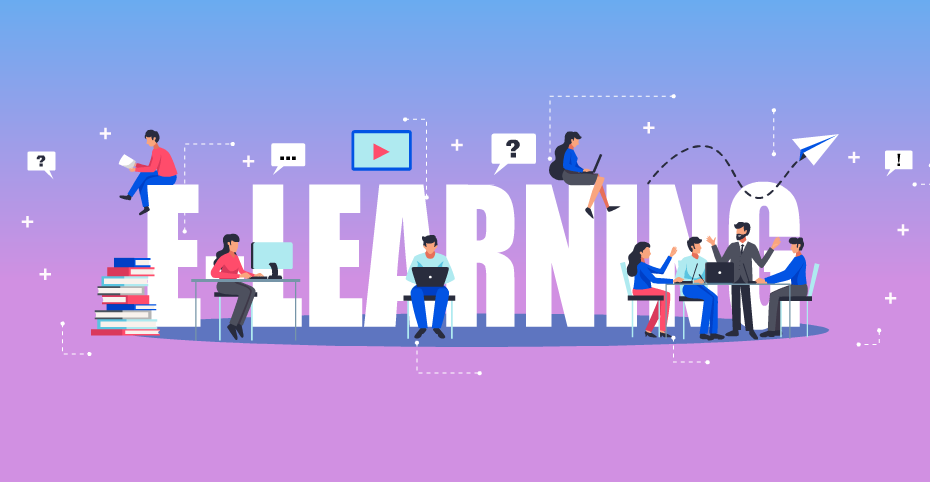

*Source*: [DeLearn](https://www.de-learn.com/e-learning/)

**Scenario:** A hypothetical e-learning company offers courses on programming, web and mobile development (*mostly*), data science, game development, and more. The company has tasked me with identifying the two best markets to advertise their product in. 

**Approach Taken**: To determine the appropriate markets to advertise the courses, the E-Learning company must have the following information about potential learners:

- What people wish to learn - what are their chosen courses/roles?
- What is the spectrum of economic investment - how much money are learners prepared to put in online education?
- Time investments - the length of time learners would want to spend in courses.
- Demographic information such as current address, work position, educational qualifications, and so on.

**Data Set**: The related information was gathered by the E-Learning portal [freeCodeCamp](https://www.freecodecamp.org/) in a survey conducted in 2017. Since freeCodeCamp runs a successful [Medium publication](https://www.freecodecamp.org/news/) with over 400,000 followers, they got answers from coders/learners with diverse interests other than web development. They made the survey's results and data accessible under a free distribution license.

The e-learning organization aims to use existing survey data rather than perform a fresh one for cost reasons as well as the range of replies accessible in the dataset. The dataset is available from the git repository [here](https://github.com/freeCodeCamp/2017-new-coder-survey).

**Sample or Population?** For this study, each market was chosen as sample data of the individual markets, since the survey wasn't completed by every potential learner/coder from every country. These participants are those who actively engaged in the survey and so represent a sample of each country and market.

### Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from pywaffle import Waffle
from scipy.stats import zscore
%matplotlib inline

# avoiding display of truncated columns 
pd.options.display.max_columns = 140
pd.options.display.max_colwidth = 50

## 2

## Data Exploration

Pandas is unable to determine the datatypes of each column. As can be seen by - <i><font color=red>DtypeWarning: Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.
    interactivity=interactivity, compiler=compiler, result=result).</font></i>
    
To disable this warning, the ```low_memory``` option of the ```read_csv``` method has been set to ```False```.

```ID.x```, ```ID.y```, ```NetworkID```, ```Part1EndTime```, ```Part1StartTime```, ```Part2EndTime```, ```Part2StartTime``` are all ID or survey timestamp-related fields that were lost at the start.

In [2]:
link = 'https://raw.githubusercontent.com/freeCodeCamp/2017-new-coder-survey/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv'
survey = pd.read_csv(link, encoding = 'latin-1', low_memory = False) # silence dtypes warning

# drop unnecessary columns from the dataset
survey.drop(columns = ["ID.x", "ID.y", "NetworkID", "Part1EndTime", 
                       "Part1StartTime", "Part2EndTime", "Part2StartTime"], axis = 1, inplace = True)
# data exploration
print('Total Rows in Survey Data:', survey.shape[0])
print('Total Columns in Survey Data:', survey.shape[1])

survey.head()

Total Rows in Survey Data: 18175
Total Columns in Survey Data: 129


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,software development and IT,NaN,Employed for wages,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,25.0,13000.0,1.0,0.0,0.0,0.0,Within 7 to 12 months,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,work for a medium-sized company,1.0,"Front-End Web Devel

### Non-null Values 

The plot below highlights the number of non-null values found in each column of the dataset.

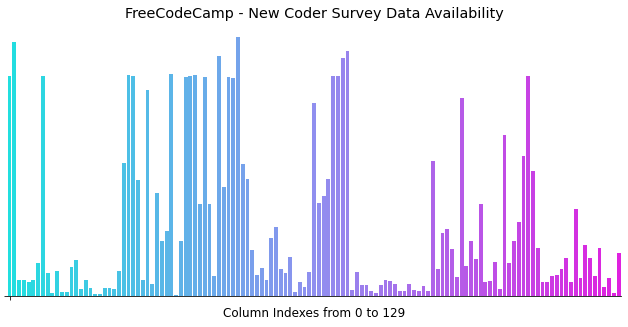

In [3]:
# plot each column's non-null proportion
fig, ax = plt.subplots(figsize = (11, 5))
sns.barplot(x = survey.columns, y = survey.notnull().sum(), ax = ax, palette = "cool")
ax.set_xticklabels([])
ax.set_xlabel('Column Indexes from 0 to 129', size = "large")
ax.set_title('FreeCodeCamp - New Coder Survey Data Availability', size = "x-large")
ax.set_yticklabels([])
ax.set_yticks([False])
ax.set_xticks([False])
sns.despine(top = True, right = True, left = True)
plt.rcParams['figure.dpi'] = 300
plt.show()

There appear to be several columns with null or empty values. It could be easier to decide which columns are important for the analysis and which ones can be disregarded.

# 3

## Identifying Relevant Columns

This analysis aims to find the most profitable markets for the company's products. Let's split this task down into several parts because it is rather ambiguous. I would divide it into **demographics**, **interest**, and **marketing possibilities**.

### Columns
#### Demographics:
 - `Age`
 - `CityPopulation`
 - `CountryCitizen`
 - `CountryLive`
 - `EmploymentField`
 - `EmploymentStatus`
 - `Gender`
 - `IsEthnicMinority`
 - `IsReceiveDisabilityBenefits`
 - `LanguageAtHome`
 - `SchoolDegree`
 - `SchoolMajor`
 - `Income`



#### Interest:
 - `HoursLearning`
 - `MoneyForLearning`
 - `MonthsProgramming`
 - `JobApplyWhen`
 - `JobInterest...` - there are 13 column options here
 - `JobRoleInterest`
 
 
#### Marketing-related questions:
-  Where are the new coders located?
-  Which locations have the most new coders?
-  How much money new coders are willing to spend on learning?
-  What media formats would be most effective in trying to reach the newbies?

# 4

## Sample Rerpresentivity

It's better to make sure the survey sample data is relevant to the population we're interested in before the analysis. At the very least, let's make sure that data is on the company's main specialties — web and mobile application development.

The ```JobRoleInterest``` column provides a description of the potential job role(s) for each participant. Participants who are interested in working in a certain domain are also likely to be interested in learning more about it. In order to determine whether the data we have is relevant, let's look at the frequency distribution table for this column.

In [4]:
print('Participants who responded for Job Role Interests:', survey['JobRoleInterest'].notnull().sum(), '\n')

print('Participants who responded for Job Role Interests (%):',
      int(survey['JobRoleInterest'].notnull().sum() / survey.shape[0] * 100))

Participants who responded for Job Role Interests: 6992 

Participants who responded for Job Role Interests (%): 38


Let's create ```transform_roles``` function, which will take each value/list of roles a participant has chosen, convert them to lower case, and replace any extra characters that distinguish the same subjects.

In [5]:
def transform_roles(row):
    roles = []
    if row is not np.nan:
        for each_val in row.split(','):
            roles.append(each_val.replace(r'  ',' ').replace('-',' ').strip().lower())
        row = roles
    return row

survey['JobRoleInterest'] = survey.JobRoleInterest.apply(transform_roles)

pd.options.display.max_colwidth = 120
# display first 5 records after transformation as sample
print('Sample rows after transformation', '\n')
print(survey['JobRoleInterest'].head(), '\n')

pd.options.display.max_colwidth = 50

Sample rows after transformation 

0                                                                                                                    NaN
1                                                                                             [full stack web developer]
2       [front end web developer, back end web developer, devops / sysadmin, mobile developer, full stack web developer]
3                                            [front end web developer, full stack web developer, back end web developer]
4    [full stack web developer, information security, mobile developer, front end web developer, back end web developer]
Name: JobRoleInterest, dtype: object 



The next thing to do is plot preparation to visualize the number of courses coders have expressed interest in and to get a general idea of the most preferred roles.

In [6]:
# number of subjects people showed interest to learn
roles = (survey['JobRoleInterest'].apply(lambda x: len(x) 
                                    if x is not np.nan else np.nan).value_counts(normalize = True).mul(100).round(2))

# number of times a particular subject has been cited by the coders
roles_dict = {}
for row in survey['JobRoleInterest']:
    if row is not np.nan:
        for each_role in row:
            if each_role in roles_dict:
                roles_dict[each_role] += 1
            else:
                roles_dict[each_role] = 1

top_roles = pd.DataFrame(roles_dict.items())
top_roles.rename(columns = {0 : 'RoleName', 1: 'Count'}, inplace = True)

# contribution of each subject percentage wise
top_roles['Count%'] = (top_roles['Count'] / top_roles['Count'].sum()).mul(100).round(2)

# only most sought out courses
top_roles = top_roles.sort_values('Count%', ascending = False)[:10]

### Most Popular Courses

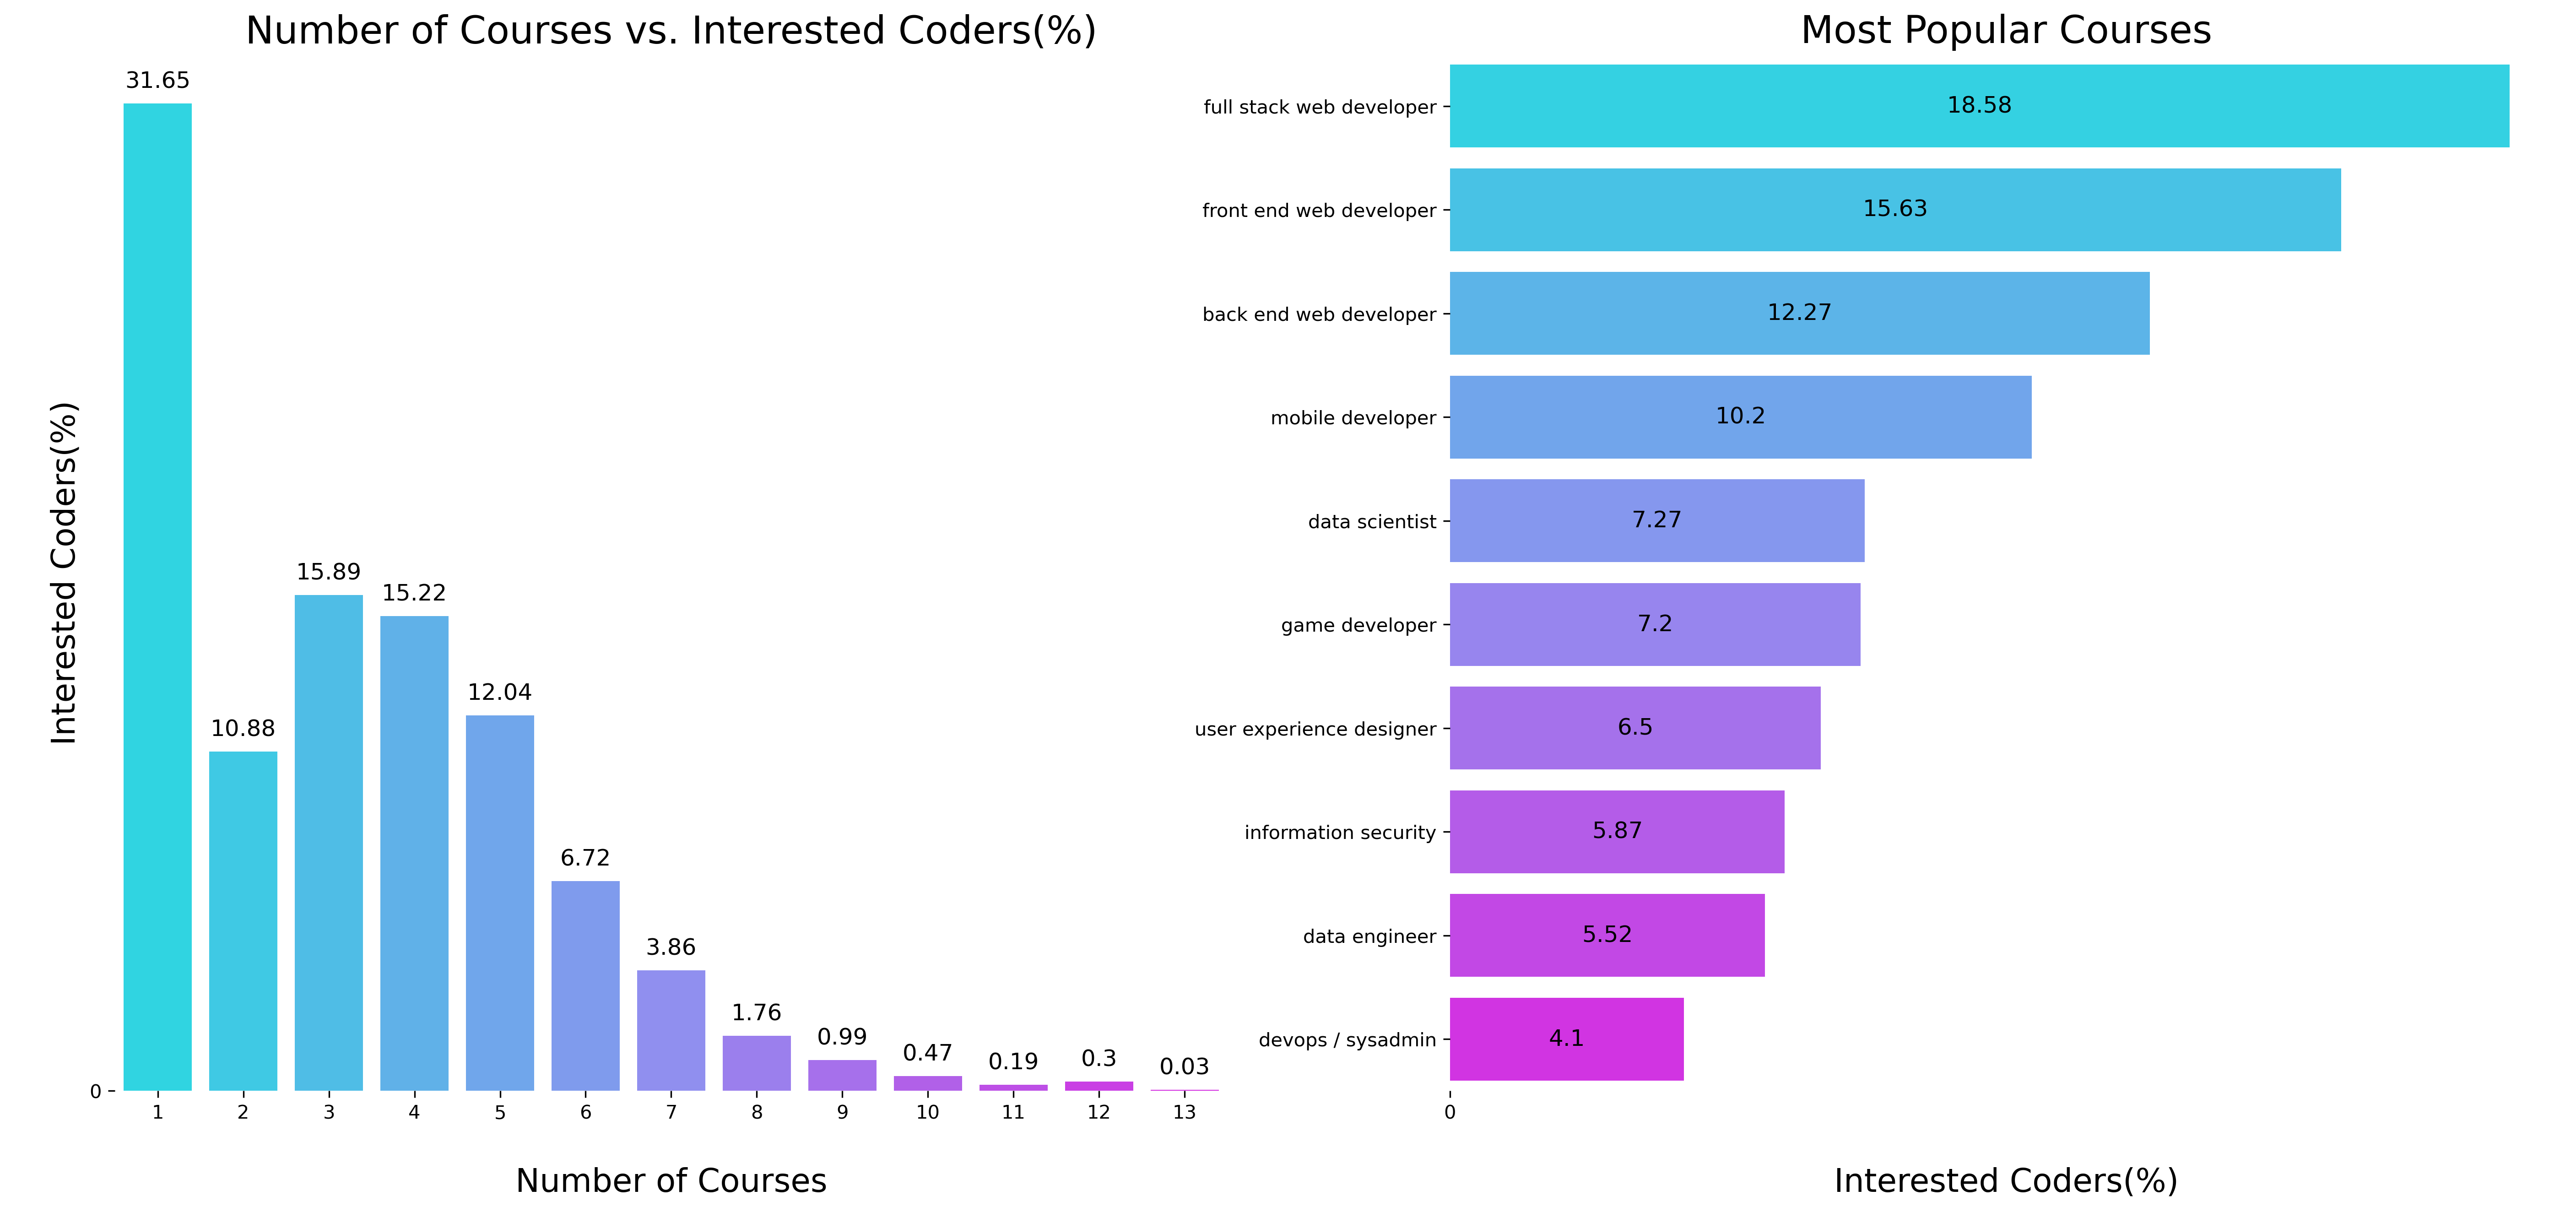

In [7]:
fig = plt.figure(figsize = (23, 10))
ax1, ax2 = fig.add_subplot(1, 2, 1), fig.add_subplot(1, 2, 2)

# plot number of courses
sns.barplot(x = roles.index.astype(int), y = roles, ax = ax1, palette = 'cool')

# plot most popular courses
sns.barplot(y = top_roles.RoleName, x = top_roles['Count%'], ax = ax2, palette = 'cool')

for ax in [ax1, ax2]:
    ax.set_ylabel('')
    if ax == ax1:
        ax.set_ylabel('\nInterested Coders(%)', size = '17')
        ax.set_yticks([False])
        ax.set_xlabel('\nNumber of Courses', size = '17')
        ax.set_title('Number of Courses vs. Interested Coders(%)', size = '20')
    else:
        ax.set_xticks([False])
        ax.set_xlabel('\nInterested Coders(%)', size = '17')
        ax.set_title('Most Popular Courses', size = '20')

sns.despine(top = True, right = True, left = True, bottom = True)

for index, row in roles.items():
    ax1.text(index - 1, row + 0.5, row, color = 'black', ha = 'center', size = '12')
    
for p in ax2.patches:
    w, h = p.get_width(), p.get_height()
    ax2.text(w * .5, p.get_y() + 0.5 * h, w, ha = 'center', va = 'center', size = '12')    
    
plt.show()

**Insights:**
- About 31% of all survey participants would want to take at least one course.
-  A total of 52% of participants said they would prefer to take 2 to 5 courses.
- 47% of all subjects of interest went within the disciplines of web development and 10% fell under mobile development; these are also the top 4 categories.

We shouldn't misinterpret these results since a participant may have entered many topics of interest. It's quite likely that a bigger percentage of people are interested in one of these topics than we may think since it's possible to list multiple topics of interest. Let's change the focus of our question so that we are counting people rather than the frequency with which a specific response occurs.

The responses can be categorized into two categories:
- *Web or Mobile* - where participants have mentioned at least one of the two roles.
- *Others* - where neither of the roles has been mentioned.

Let's create ```web_mob``` function, which will look for "web dev" or "mobile dev" in the list of categories and classify as ```web or mobile``` if either of the two roles are found, else return ```others```.

In [8]:
def web_mob(in_list):
    category = re.compile(r'(web\sdeve|mobile\sdeve)')
    if in_list is not np.nan:
        new_list = list(filter(category.search, in_list))
        if len(new_list) > 0:
            return 'web or mobile'
        else:
            return 'others'

survey['WebOrMobDev'] = survey['JobRoleInterest'].apply(web_mob)

### Interest in Two Industries - Web and Mobile Development

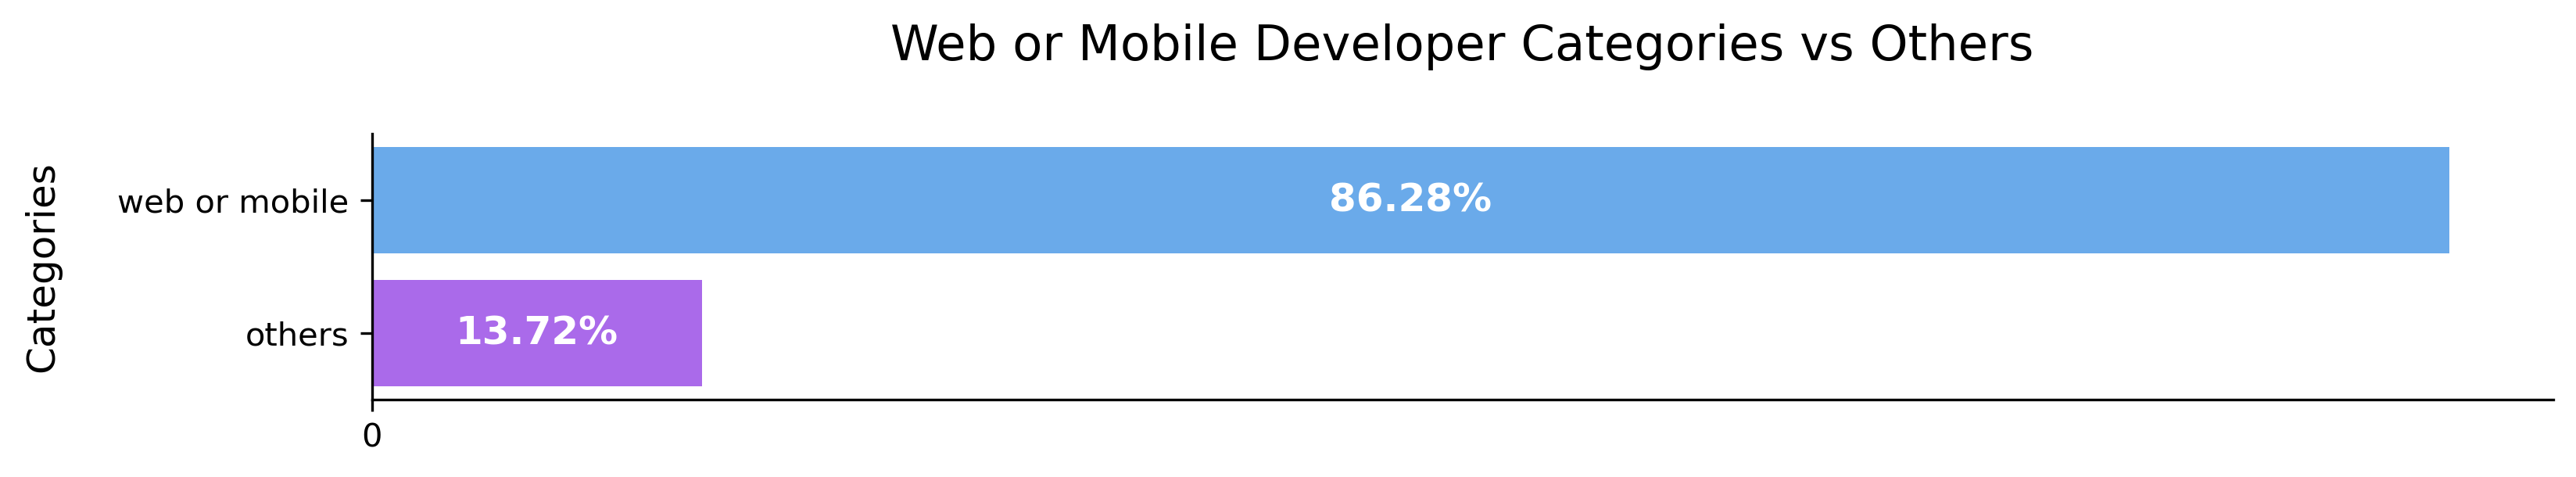

In [9]:
fig, ax = plt.subplots(figsize = (12, 1.5))

sns.barplot(ax = ax, y = survey['WebOrMobDev'].value_counts().index, 
            x = survey['WebOrMobDev'].value_counts(normalize = True), palette = 'cool')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    ax.text(width * 0.5, p.get_y() + 0.5 * height, str(round(width * 100, 2))+ '%',
            ha = 'center', va = 'center', size = '12', color = 'white', fontweight = 'bold')

ax.set_title('Web or Mobile Developer Categories vs Others\n', size = '15')
ax.set_ylabel('Categories\n', size = 12)
ax.set_xticks([False])
ax.set_xlabel("")
sns.despine()
plt.show()

This breakdown, which demonstrates that more than **86%** of all respondents are interested in Web or Mobile development, further supports the results.

# 5

## Locations and Densities

Let's start by determining the locations of these new coders and the densities (number of new coders) at each location. This should be a decent starting point when determining which two markets our marketing strategy should target. Each participant's location is described in the data set at the country level. Each country can be considered as a separate market. Thus, finding the two best countries to promote in is the goal.

The most helpful column for these purposes will be the ```CountryLive```. Whether these people reside in urban or rural locations will also be important to know.

Since we want our results to be representative, let's first all rows where participants haven't responded to preferred ```JobRoleInterest``` question.

In [10]:
survey = survey.dropna(subset = ['JobRoleInterest'])

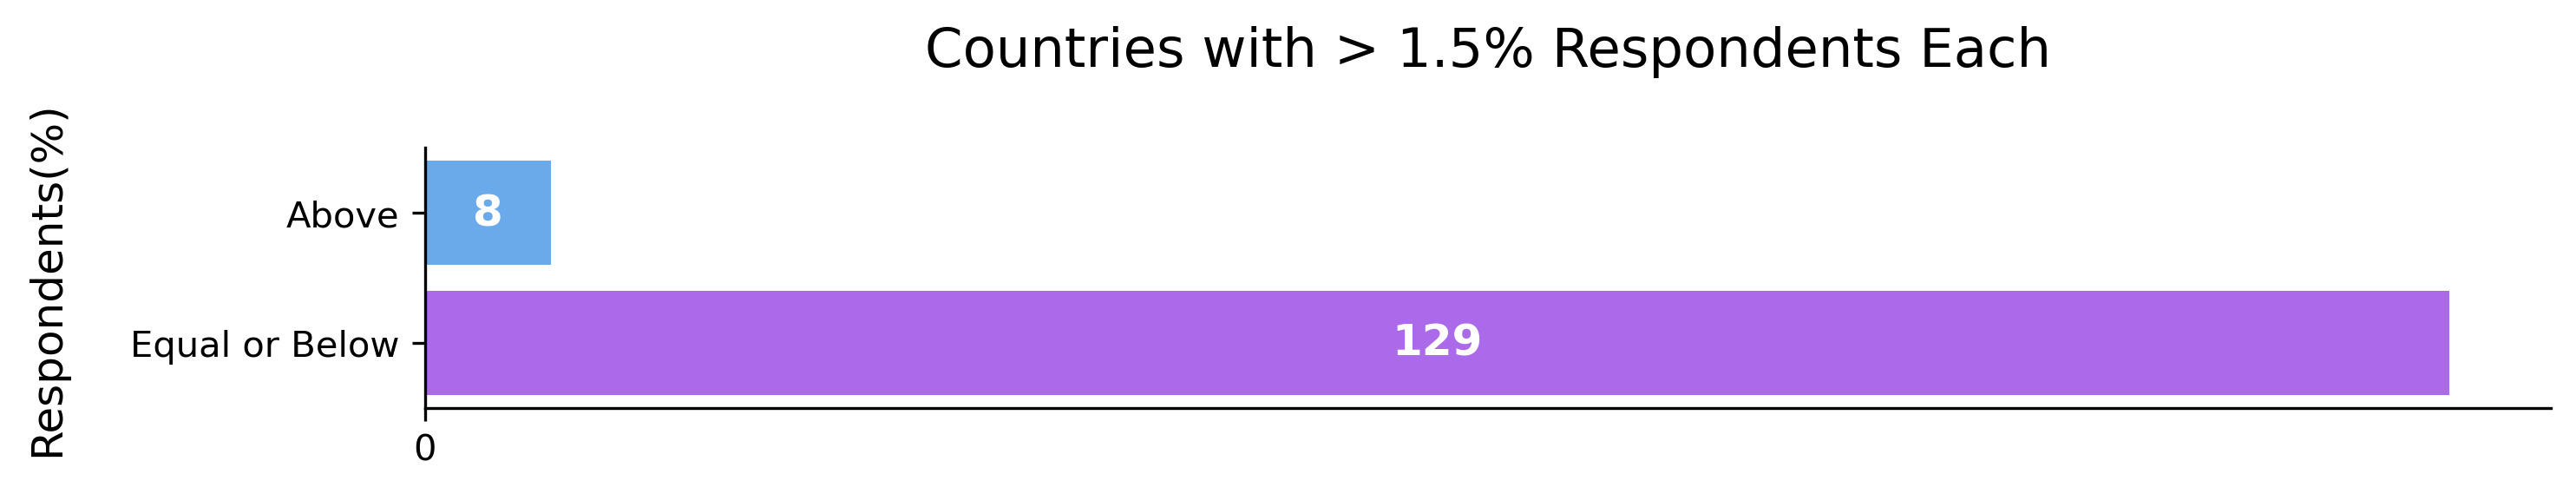

In [11]:
fig, ax = plt.subplots(figsize = (10, 2))

# group countries with more than, equal to, or less than 1.5% of the participant population
sns.barplot(y = ['Above', 'Equal or Below'], 
            x = [(survey['CountryLive'].value_counts(normalize = True) > 0.015).sum(),
                 (survey['CountryLive'].value_counts(normalize = True) <= 0.015).sum()],
            palette = 'cool')

ax.set_title('Countries with > 1.5% Respondents Each\n', size = '15')
ax.set_ylabel('Respondents(%)\n', size = 12)
ax.set_xticks([False])
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    ax.text(width * 0.5, p.get_y() + 0.4, int(width), size = '12', color = 'white', fontweight = 'demibold',
            ha = 'center', va = 'center')
    
sns.despine()
plt.tight_layout()
plt.show()

**Insights:**
- A total of 8 countries each, have shown responses from more than 1.5% of total respondents who attempted the survey.
- A total of 129 countries each, have shown responses from 1.5% or below, of the total coders who attempted the survey.

### Distribution of Participants
The following distribution only provides a granular perspective of the top 8 countries. The plot and data show the percentage contribution of the coder population in each of the 8 countries.

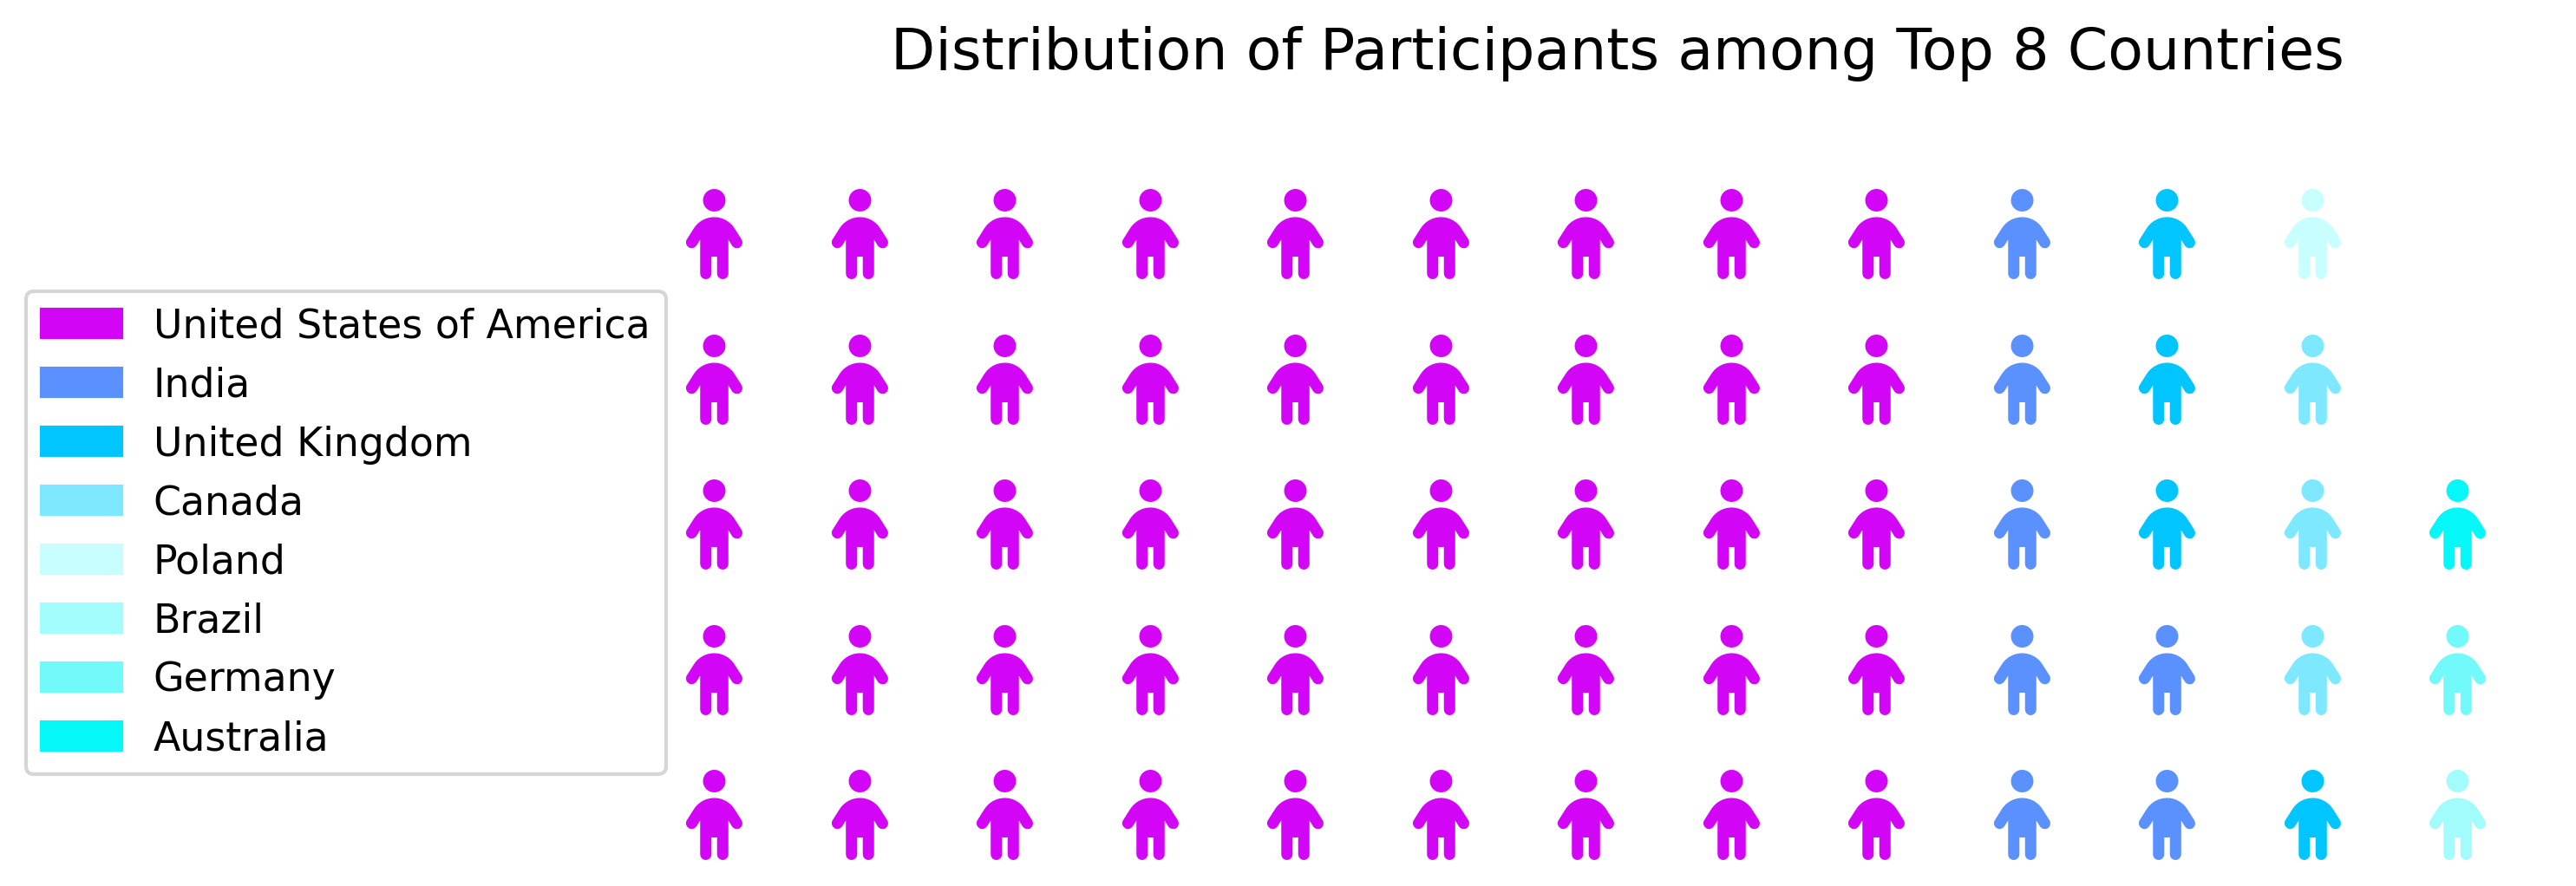

{'United States of America': 45, 'India': 7, 'United Kingdom': 4, 'Canada': 3, 'Poland': 1, 'Brazil': 1, 'Germany': 1, 'Australia': 1}


In [12]:
data = dict(survey['CountryLive'].value_counts(normalize = True).mul(100).astype(int)[:8])

fig = plt.figure(FigureClass = Waffle, rows = 5, values = data, icons = 'child', icon_size = 25,
                 legend = {'loc':'right', 'bbox_to_anchor': (0,0.45), 'fontsize': 11},
                 colors=('#d305f7', '#5b90ff', '#00c5ff', '#7de8ff', '#c8fefe', '#a2fcfc', '#72fafa', '#05f7f7'),
                 figsize = (10,4))
plt.title('Distribution of Participants among Top 8 Countries', y = 1.08, size = '16')
plt.show()
print(data)

**Insights:**
Even with top 8 countries, the dataset is right skewed with the majority of survey respondents located in the United States. The next three countries with a large number of coders are India, the United Kingdom, and Canada.

*The search for possible markets may be limited down to 4 countries: the **United States**, **India**, **the United Kingdom**, and **Canada**.*

# 6

## Spending Money on Learning

Now let's dig deeper and determine the actual amount of money people are prepared to spend on education. It's quite doubtful that advertising will be successful for in high-density areas where the majority of people only want to study for free. To determine the profit potential of the 4 markets, the investment potential of people needs to be analysed.

The relevant columns for the analysis:
- ```MoneyForLearning``` column describes in USD, the amount of money spent by participants from the moment they started coding until the moment they completed the survey. The company's price for subscription is $59 per month.
- ```MonthsProgramming``` column may be used to determine the average monthly spending for each student.

### Amount of Money Spent per Month

In [13]:
survey = survey[survey['CountryLive'].isin(['United States of America', 'India', 'United Kingdom', 'Canada'])]

# if the participant responded with 0 as value, then MonthsProgramming is assigned 1 
survey.loc[survey['MonthsProgramming'] == 0, 'MonthsProgramming'] = 1

# new column for amount of money spent by participant per month
survey['SpentPerMonth'] = survey['MoneyForLearning'] / survey['MonthsProgramming']

# limit survey data to rows with non-null values for SpentPerMonth
survey = survey.dropna(subset = ['SpentPerMonth'])

# compare avg amount spent per month for the 4 markets
pd.DataFrame(survey.groupby('CountryLive').SpentPerMonth.mean().sort_values())

,SpentPerMonth
CountryLive,
United Kingdom,45.534443
Canada,113.510961
India,135.100982
United States of America,227.997996


The results for the United Kingdom and Canada are quite surprising in comparison to the results for India. If we examine a few socioeconomic measures (such as [GDP per capita](https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(PPP)_per_capita#Lists_of_countries_and_dependencies)), we may anticipate people in the United Kingdom and Canada to spend more money on education than individuals in India. Fairly, this pinpoints the *presence of outliers* in the data.

# 7

## Identifying Outliers

The [Interquartile Deviation](https://docs.oracle.com/cd/E17236_01/epm.1112/cb_statistical/frameset.htm?ch07s02s10s01.html) method is one of the most often used techniques for identifying outliers. This approach is also used by violin and boxplots to emphasize outliers from the data's median dispersion.

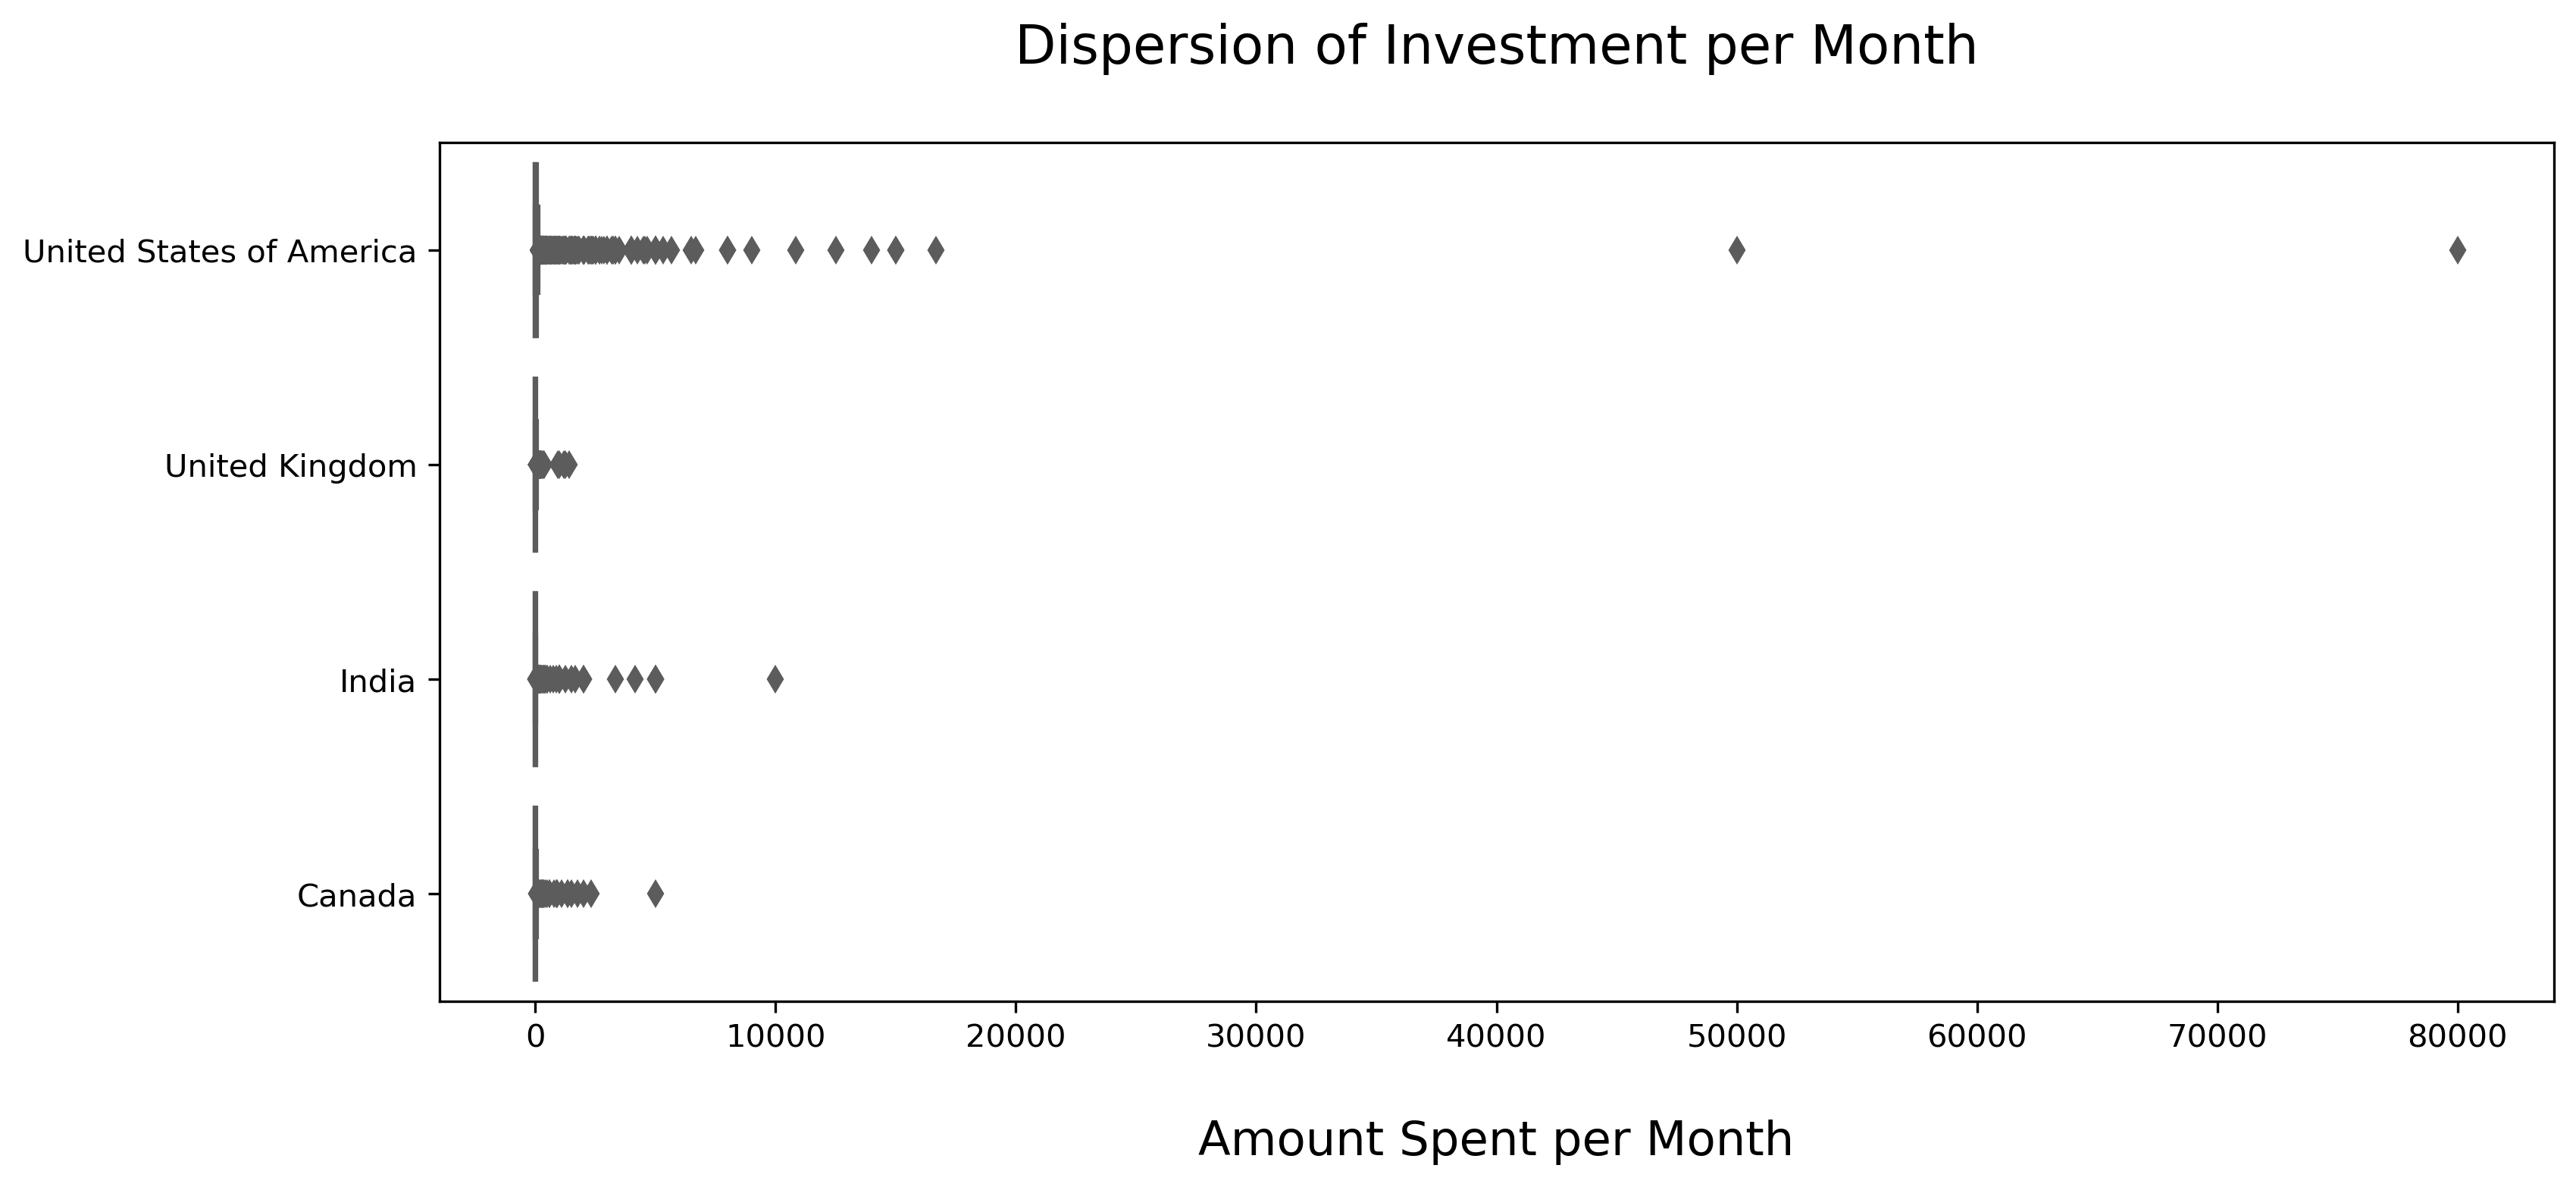

In [14]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 5))
sns.boxplot(ax = ax, y = 'CountryLive', data = survey, x = 'SpentPerMonth', palette = 'cool')
ax.set_ylabel('')
ax.set_xlabel('\nAmount Spent per Month', size = '15')
ax.set_title('Dispersion of Investment per Month\n', size = '17')
plt.show()

The United States has two extraordinarily high values for monthly investments. Although these values are quite possible, and hence are eliminated outright.
Let's filter dataframe so that ```SpentPerMonth``` values are below $20,000.

In [15]:
survey = survey[survey.SpentPerMonth < 20000]

### Isolated Boxplot Visualization for Each Market

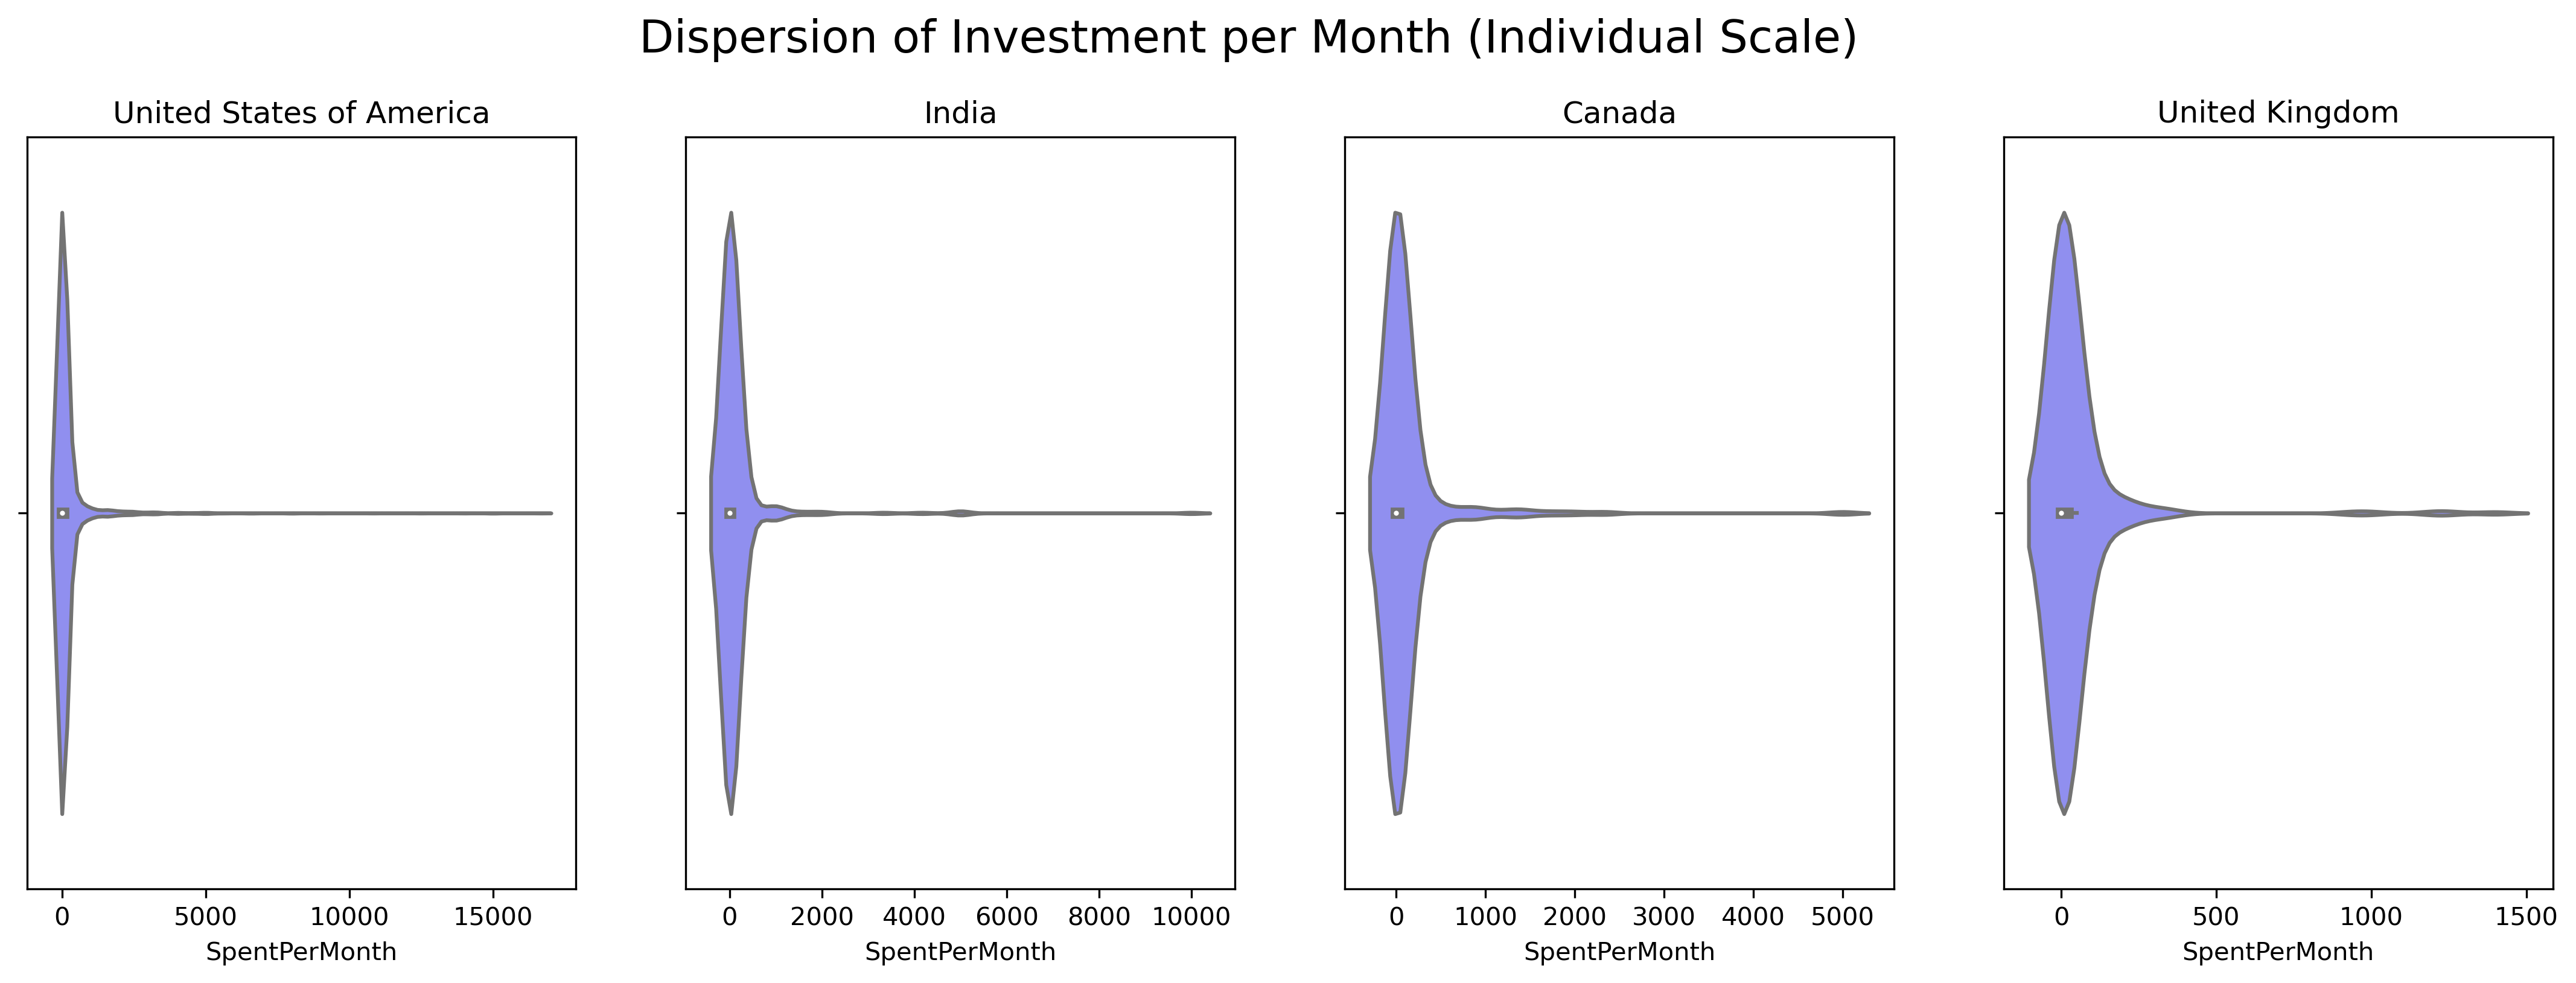

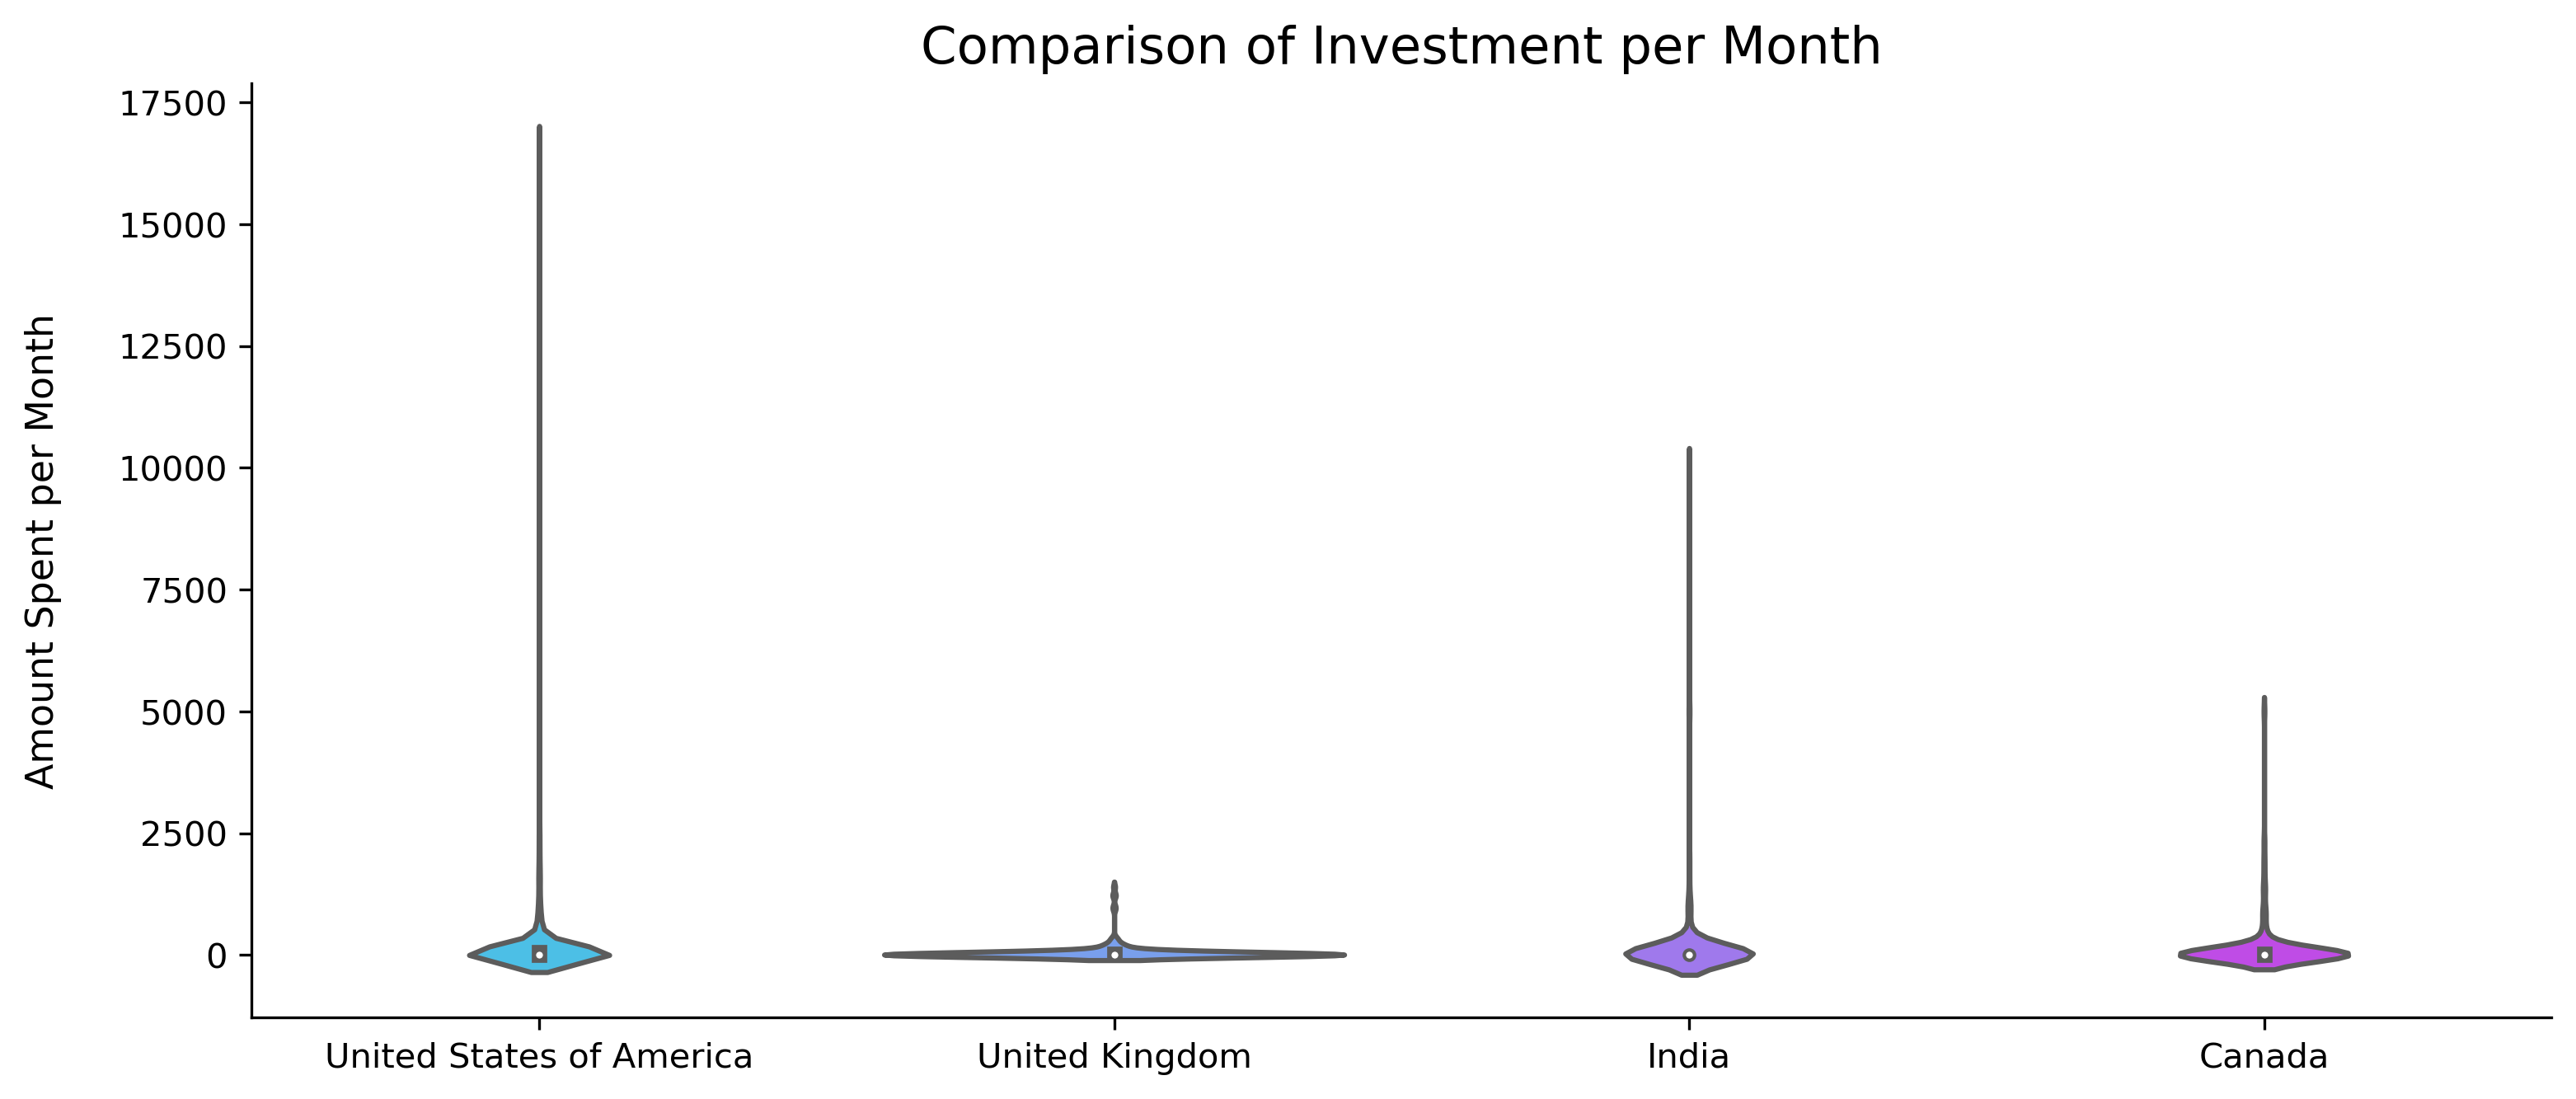

In [16]:
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (18, 5.5))

markets = ['United States of America', 'India', 'Canada', 'United Kingdom']

for each in markets:
    ax_position = markets.index(each)
    sns.violinplot(survey.loc[survey['CountryLive'] == each, 'SpentPerMonth'], orient = 'v', 
                ax = axes[ax_position], palette = 'cool')
    axes[ax_position].set_title(str(each), color = 'black', size = '12')
    axes[ax_position].set_ylabel('')
    
plt.suptitle('Dispersion of Investment per Month (Individual Scale)', size = '18', y = 1)
plt.show()

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 5))
sns.violinplot(ax = ax, x = 'CountryLive', data = survey, y = 'SpentPerMonth', palette = 'cool')
ax.set_xlabel('')
ax.set_ylabel('Amount Spent per Month\n', size = '11')
ax.set_title('Comparison of Investment per Month', size = '15')
sns.despine()
plt.show()

**Insights:**

Although United Kingdom has few outliers, they still don't exceed the lowest outliers present in India or Canada.

### Examine outliers - India

Let's conduct a brief analysis in order to verify that the outliers are indeed outliers for India. The analysis will be based on the idea that the person has attended boot camps or coding events. Since these camps and events could have registration fees the same might be viewed as expenses. The minimum value for this analysis is $2,500, so let's drop any columns that don't satisfy this criteria.

In [17]:
survey.loc[(survey.SpentPerMonth >= 2500) & (survey.CountryLive == 'India')].dropna(axis = 1)

,Age,AttendedBootcamp,CityPopulation,CountryCitizen,CountryLive,EmploymentStatus,ExpectedEarning,Gender,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasServedInMilitary,HoursLearning,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,JobApplyWhen,JobPref,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,SchoolDegree,SchoolMajor,WebOrMobDev,SpentPerMonth
1728,24.0,0.0,"between 100,000 and 1 million",India,India,A stay-at-home parent or homemaker,70000.0,male,0.0,0.0,1.0,0.0,30.0,0.0,0.0,0.0,Within the next 6 months,work for a startup,"[user experience designer, mobile developer, p...",in an office with other developers,Bengali,"single, never married",20000.0,4.0,bachelor's degree,Computer Programming,web or mobile,5000.000000
1755,20.0,0.0,more than 1 million,India,India,Not working and not looking for work,100000.0,male,0.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,I haven't decided,work for a multinational corporation,"[information security, full stack web develope...",no preference,Hindi,"single, never married",50000.0,15.0,bachelor's degree,Computer Science,web or mobile,3333.333333
7989,28.0,0.0,"between 100,000 and 1 million",India,India,Employed for wages,500000.0,male,1.0,1.0,1.0,0.0,20.0,0.0,0.0,0.0,more than 12 months from now,work for a multinational corporation,"[user experience designer, back end web develo...",in an office with other developers,Marathi,married or domestic partnership,5000.0,1.0,bachelor's degree,Aerospace and Aeronautical Engineering,web or mobile,5000.000000
8126,22.0,0.0,more than 1 million,India,India,Not working but looking for work,80000.0,male,1.0,0.0,1.0,0.0,80.0,0.0,0.0,0.0,I'm already applying,work for a startup,"[back end web developer, full stack web develo...",in an office with other developers,Malayalam,"single, never married",5000.0,1.0,bachelor's degree,Electrical and Electronics Engineering,web or mobile,5000.000000
13398,19.0,0.0,more than 1 million,India,India,Unable to work,100000.0,male,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0,I haven't decided,work for a multinational corporation,[mobile developer],no preference,Hindi,"single, never married",20000.0,2.0,bachelor's degree,Computer Science,web or mobile,10000.000000
15587,27.0,0.0,more than 1 million,India,India,Employed for wages,65000.0,male,1.0,1.0,1.0,0.0,36.0,0.0,0.0,0.0,I haven't decided,work for a startup,"[full stack web developer, data scientist]",from home,Hindi,"single, never married",100000.0,24.0,bachelor's degree,Communications,web or mobile,4166.666667


There is lack of information regarding whether coders attended camps or events (if any). Also, if they saw student loans as investments, that information is missing. Because the data's legitimacy cannot be proved for now, these results will be classified as outliers.

### Examine Outliers - Canada

In [18]:
survey[(survey.SpentPerMonth >= 2500) & (survey.CountryLive == 'Canada')].dropna(axis = 1)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,CityPopulation,CodeEventConferences,CodeEventFCC,CodeEventMeetup,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentStatus,ExpectedEarning,Gender,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataSci,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestMobile,JobInterestProjMngr,JobInterestUX,JobPref,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,PodcastNone,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceFCC,ResourceSO,ResourceW3S,SchoolDegree,SchoolMajor,YouTubeFCC,YouTubeMIT,WebOrMobDev,SpentPerMonth
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,more than 1 million,1.0,1.0,1.0,1.0,30 to 44 minutes,Canada,Canada,finance,Employed for wages,60000.0,male,1.0,0.0,1.0,1.0,0.0,0.0,250000.0,10.0,140000.0,1.0,1.0,0.0,0.0,I haven't decided,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,work for a multinational corporation,"[mobile developer, full stack web developer, d...",from home,Yue (Cantonese) Chinese,"single, never married",10000.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,bachelor's degree,Finance,1.0,1.0,web or mobile,5000.0


There is just one outlier for Canada data when the threshold is set at $2,500. The person has responded positively for boot camp program, but no information about college loans or debt is accessible. This might be the situation of one-time payments paid for a course/boot camp rather than a subscription-based system.

### Examine Outliers - USA

In [19]:
survey[(survey.SpentPerMonth >= 10000) & (survey.CountryLive == 'United States of America')].dropna(axis = 1)

,Age,AttendedBootcamp,CityPopulation,CountryCitizen,CountryLive,EmploymentStatus,Gender,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasServedInMilitary,HoursLearning,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,JobApplyWhen,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,SchoolDegree,WebOrMobDev,SpentPerMonth
3930,31.0,0.0,"between 100,000 and 1 million",United States of America,United States of America,Not working and not looking for work,male,1.0,0.0,1.0,0.0,50.0,1.0,0.0,0.0,Within the next 6 months,work for a startup,1.0,"[devops / sysadmin, front end web developer, f...",no preference,English,married or domestic partnership,65000.0,6.0,bachelor's degree,web or mobile,10833.333333
6805,46.0,1.0,"between 100,000 and 1 million",United States of America,United States of America,Not working but looking for work,male,1.0,0.0,1.0,0.0,45.0,1.0,0.0,0.0,Within the next 6 months,work for a multinational corporation,1.0,"[full stack web developer, game developer, pro...",no preference,English,married or domestic partnership,15000.0,1.0,bachelor's degree,web or mobile,15000.000000
7198,32.0,0.0,more than 1 million,United States of America,United States of America,Employed for wages,male,1.0,0.0,1.0,0.0,4.0,1.0,0.0,0.0,I'm already applying,work for a multinational corporation,0.0,"[full stack web developer, back end web develo...",no preference,Spanish,"single, never married",70000.0,5.0,"professional degree (MBA, MD, JD, etc.)",web or mobile,14000.000000
16650,29.0,0.0,more than 1 million,United States of America,United States of America,Not working but looking for work,male,1.0,1.0,1.0,0.0,40.0,1.0,1.0,0.0,I'm already applying,work for a multinational corporation,1.0,"[product manager, data engineer, full stack we...",in an office with other developers,English,married or domestic partnership,200000.0,12.0,associate's degree,web or mobile,16666.666667
16997,27.0,0.0,more than 1 million,United States of America,United States of America,Employed for wages,female,1.0,1.0,1.0,0.0,12.0,1.0,0.0,0.0,Within 7 to 12 months,work for a medium-sized company,1.0,"[mobile developer, game developer, user experi...",in an office with other developers,English,"single, never married",12500.0,1.0,"some college credit, no degree",web or mobile,12500.000000
17231,50.0,0.0,"less than 100,000",Kenya,United States of America,Not working but looking for work,female,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,Within the next 6 months,work for a nonprofit,0.0,[front end web developer],in an office with other developers,English,married or domestic partnership,30000.0,2.0,bachelor's degree,web or mobile,15000.000000


Again, there isn't much information accessible for these coders in terms of bootcamps or code events. It's time to shift tactics!

### Summary of Statistics 

The table below describes the data distribution in percentiles for each market with extreme outliers.

In [20]:
survey.groupby('CountryLive').SpentPerMonth.describe(percentiles = [0.25, 0.50, 0.75, 0.95, 0.99])

,count,mean,std,min,25%,50%,75%,95%,99%,max
CountryLive,,,,,,,,,,
Canada,240.0,113.510961,441.014158,0.0,0.0,0.000000,25.000000,592.803030,1902.500000,5000.000000
India,463.0,135.100982,692.960378,0.0,0.0,0.000000,13.250000,491.650000,3650.000000,10000.000000
United Kingdom,279.0,45.534443,162.311836,0.0,0.0,0.000000,20.416667,200.000000,1044.000000,1400.000000
United States of America,2931.0,183.800110,864.767219,0.0,0.0,3.333333,50.000000,833.333333,3308.333333,16666.666667


The 99th percentile for each market illustrates that the concentration of data points is *significantly lower* than the maximum amount spent each month for the three markets - USA, UK, and Canada.

# 8

## Eliminating Extreme Outliers

Another technique for detecting outliers is the [Mean and Standard Deviation Method](https://docs.oracle.com/cd/E17236_01/epm.1112/cb_statistical/frameset.htm?ch07s02s10s01.html) which calculates the distance of each value from the mean of all of the sample values. 

[Delta Degrees of Freedom](https://www.investopedia.com/terms/d/degrees-of-freedom.asp) should be 0 or 1. For this project ddof is 1.

In [21]:
# group each market/country
market_group = survey.groupby('CountryLive')

# calculate zscore for each value for InvestPerMonth column with ddof = 1
survey['Spent_ZScore'] = market_group.SpentPerMonth.transform(lambda x: zscore(x, ddof = 1))

The default value for SD in the standard deviation method is 3. In other words, an outlier may be defined as a data point in a sample variable with a standard deviation of 3 or more. In the next table, let's filter out all the data points for each market with an SD equal to or more than 3.

*The UK's outliers were earlier classified to be within the lowest outlier data points of Canada and India, hence they won't be included in the table.*

In [22]:
survey.loc[(market_group.Spent_ZScore.apply(lambda x: x >= 3)) & (survey.CountryLive != 'United Kingdom'),
               ['SpentPerMonth', 'CountryLive', 'Spent_ZScore']].sort_values(['CountryLive', 'Spent_ZScore'],
                                                                             ascending = False).reset_index(drop = True)

,SpentPerMonth,CountryLive,Spent_ZScore
0,16666.666667,United States of America,19.060466
1,15000.000000,United States of America,17.133166
2,15000.000000,United States of America,17.133166
3,14000.000000,United States of America,15.976785
4,12500.000000,United States of America,14.242214
5,10833.333333,United States of America,12.314913
6,9000.000000,United States of America,10.194882
7,8000.000000,United States of America,9.038502
8,8000.000000,United States of America,9.038502
9,6666.666667,United States of America,7.496661


With particular attention paid to India and Canada, we can see from the table above that the SD increases sharply after 5 (SD = 5). I can consider the following alternatives:
- Choose the standard rule of removing data points with more than 3 SD.
- Customize the selection of SD for each market.

Let's eliminate data points, away from the mean by 4 standard deviations.

In [23]:
usa = survey.query("Spent_ZScore <= 4 & CountryLive == 'United States of America'")
canada = survey.query("Spent_ZScore <= 4 & CountryLive == 'Canada'")
india = survey.query("Spent_ZScore <= 4 & CountryLive == 'India'")
uk = survey.query("CountryLive == 'United Kingdom'")

survey_filtered = pd.concat([uk, usa, canada, india])

Now let's display a summary of statistics and visualization for each country without extreme outliers.

In [24]:
survey_filtered.groupby('CountryLive').SpentPerMonth.describe(percentiles = [0.25, 0.50, 0.75, 0.95, 0.99])

,count,mean,std,min,25%,50%,75%,95%,99%,max
CountryLive,,,,,,,,,,
Canada,237.0,75.550481,241.474691,0.0,0.0,0.0,22.222222,433.333333,1333.333333,1750.0
India,457.0,65.758763,233.452738,0.0,0.0,0.0,12.500000,340.666667,1110.000000,2000.0
United Kingdom,279.0,45.534443,162.311836,0.0,0.0,0.0,20.416667,200.000000,1044.000000,1400.0
United States of America,2905.0,119.306296,382.716521,0.0,0.0,3.0,45.000000,666.666667,2221.333333,3500.0


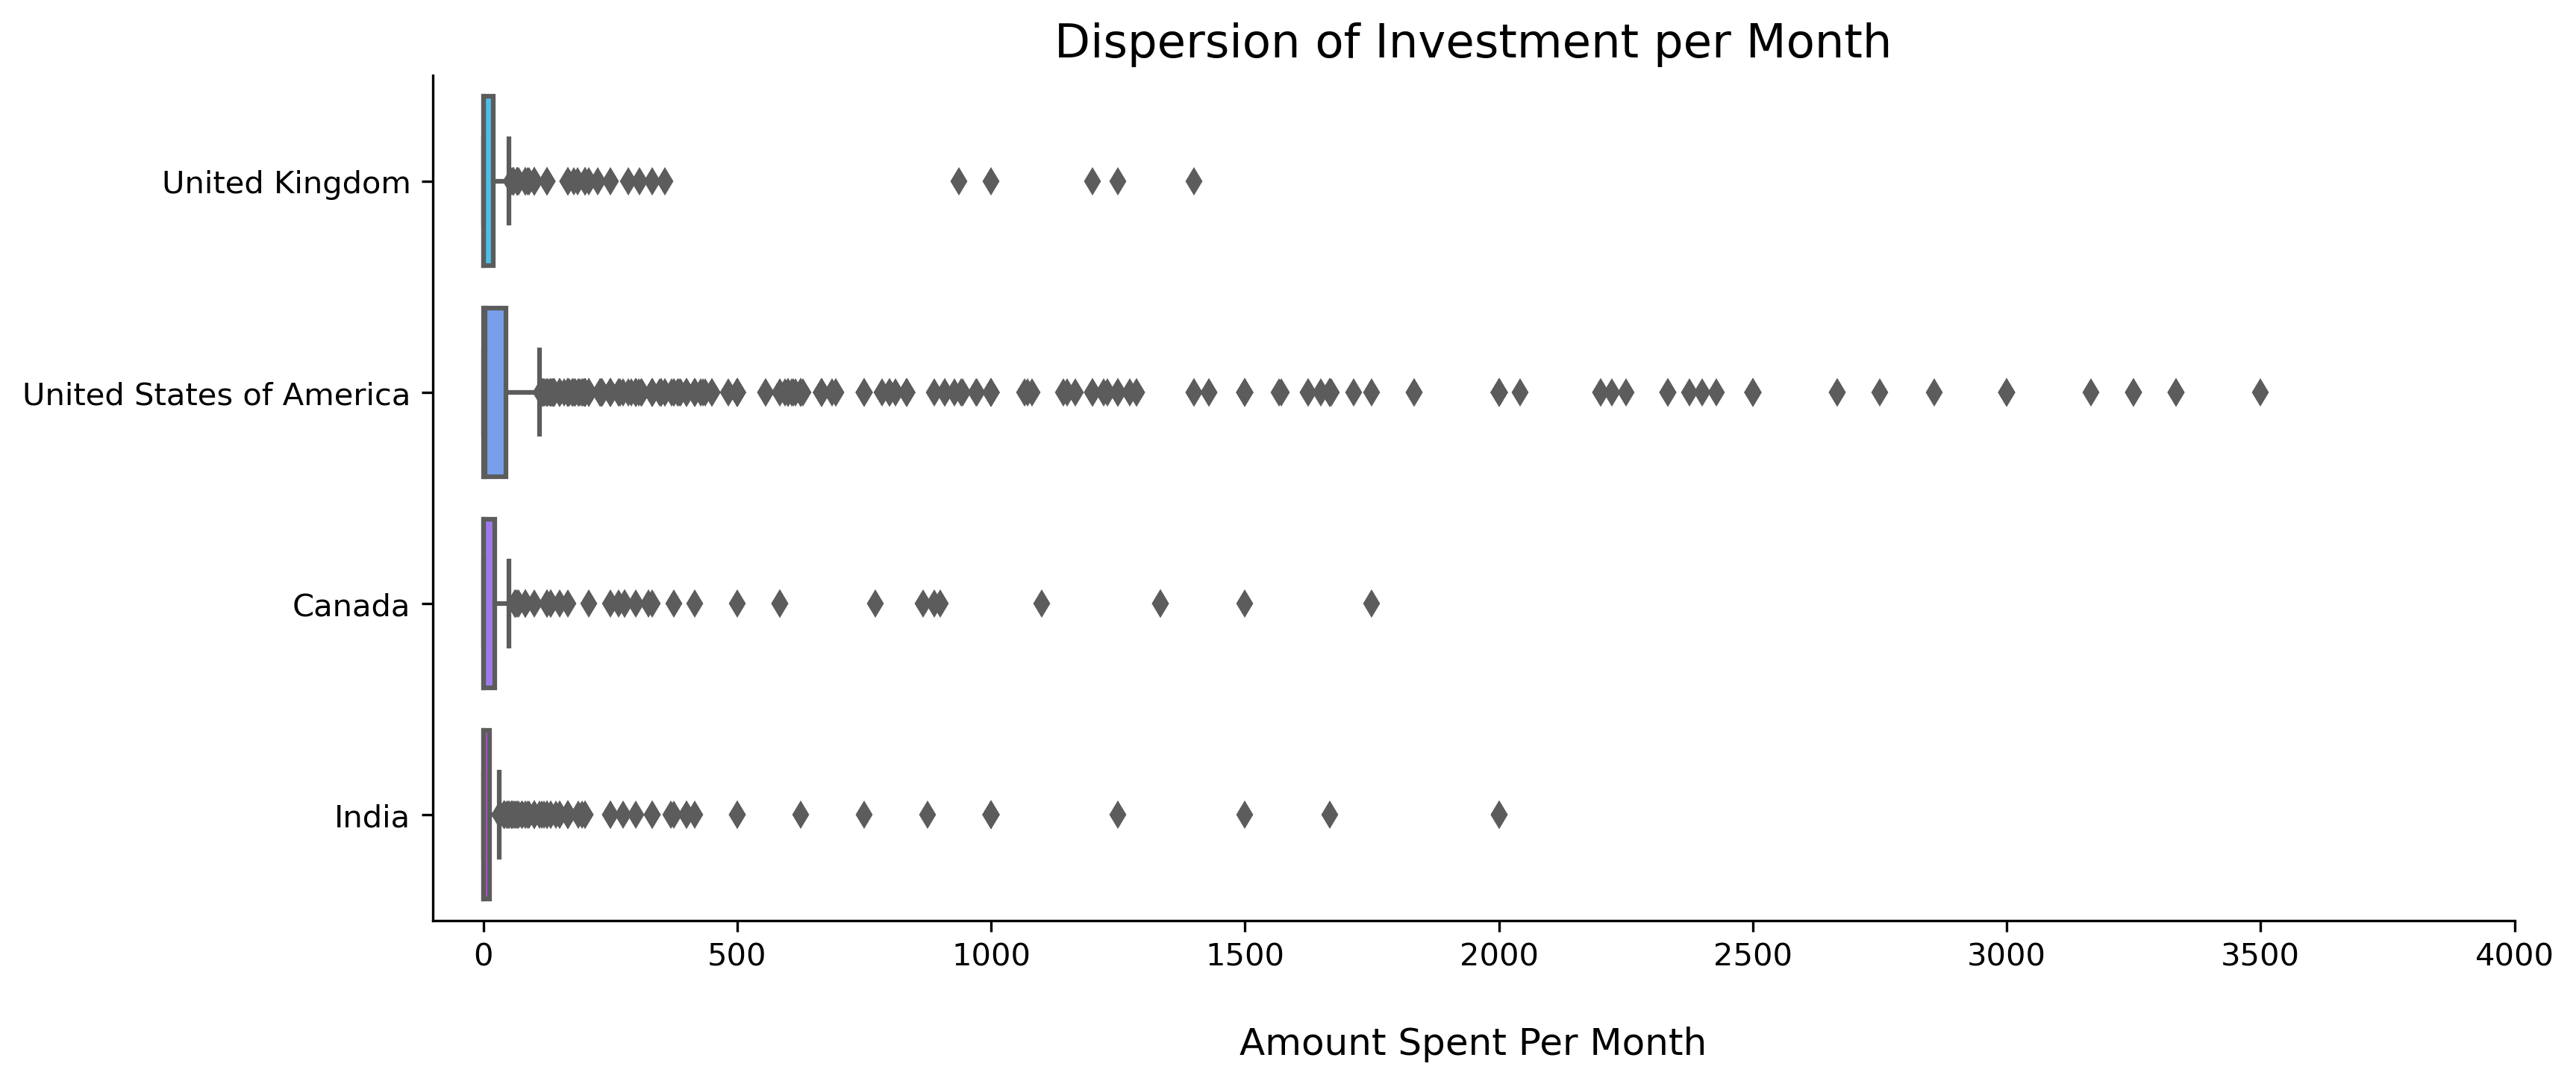

In [25]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 5))
sns.boxplot(ax = ax, y = 'CountryLive', data = survey_filtered, x = 'SpentPerMonth', palette = 'cool')
ax.set_ylabel('')
ax.set_xlabel('\nAmount Spent Per Month', size = '12')
ax.set_title('Dispersion of Investment per Month', size = '15')
ax.set_xlim(-100, 4000)
sns.despine()
plt.show()

In [26]:
pd.DataFrame({'Survey Participants (%)': survey_filtered.CountryLive.value_counts(normalize = True).mul(100).astype(int)})

,Survey Participants (%)
United States of America,74
India,11
United Kingdom,7
Canada,6


# 9

## Conclusion - Choosing the Two Best Markets

### First Market


The E-Learning company has a monthly subscription business model and charges $59 a month. **United States** is clearly the best country and market for the company to spend in for its advertising campaign.

### Second Market
When it comes to the second market, the following observations should be taken into account:
- Participants from the UK made up 7% of the total, while those from Canada made up 6%. Nevertheless, people in the United Kingdom are only ready to pay less than the base subscription price. UK as a market can thus be eliminated from this question.


- India has demonstrated a larger number of people participating in the survey (11%) than Canada (6%).


- India spends less money on average than Canada does, yet it is still competent.


- The rapidly expanding market potential of many companies in India, along with government policies that encourage higher innovation and digitization, provide strong justifications for skill development for the future workforce or upskilling of the existing workforce.

___

Based on such similar results (Canada and India), the E-Company has a few choices, including: 

- Choose **US** and **Canada** since they have greater spending potential but less prospective customers.
- Choose **US** and **India**, which have a combination of high and low expenditure but lack a ready-to-spend customer base.
- Choose **US** as the obvious choice and develop small test-campaigns for **Canada** and **India**. Then consider the outcomes of these small campaigns further before deciding on the second market.
- Choose all 3 - **US**, **Canada**, **India**, and split the budget proportionally.

The overall goal of the project is to help E-Learning company in increasing their clientele, which requires teamwork and cooperation from all departments. Thus, it's better to keep the marketing team up to date  on the project's results and the opportunities available on the basis, as this will help the team choose the best markets.

